In [1]:
# Create a single jupyter notebook and perform the following tasks in it. 
# Save it as PDF file and submit.
#  1. Load the dataset and perform following pre-processing tasks: [2 pts]
#       1.1 Remove the first column of ‘Unnamed: 0’
#       1.2 Detect missing values, and replace them with the mean.
#       1.3 Draw box-plots for each attribute to detect if there are any 
#           outliers. If there are outliers, ignore them for now.
#       1.4 Normalize all attributes within the range of 0 to 1.
#  2. Visualize through scatter plots the relationship of each attribute 
#     with the target attribute. [1 pt]
#  3. Split the dataset into train (70%) and test (30%) [1 pt]
#  4. Train the linear regression model and print the coefficients
#     (parameters) learned by the final model. [2 pt]
#  5. Print the confidence interval and p-value of each coefficient, 
#     and explain your interpretations. [2 pt]
#  6. Evaluate the linear regression model and print the values of RMSE, 
#     MAE, and MSE. [1 pt]
#  7. Plot residual curve and Q-Q plot. [1 pt] 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pr
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# 1.
data = pd.read_csv('popularity.csv')
pop_df = pd.DataFrame(data)
pop_df.head()

,Unnamed: 0,avg_shares,avg_comments,avg_expert,popularity_score
0,19,147.3,23.9,19.1,14.6
1,91,28.6,1.5,33.0,7.3
2,166,17.9,37.6,21.6,8.0
3,196,94.2,4.9,8.1,9.7
4,42,293.6,27.7,1.8,20.7


In [4]:
# 1.1
pop_df.drop(columns = ['Unnamed: 0'], inplace = True)
pop_df.head()

,avg_shares,avg_comments,avg_expert,popularity_score
0,147.3,23.9,19.1,14.6
1,28.6,1.5,33.0,7.3
2,17.9,37.6,21.6,8.0
3,94.2,4.9,8.1,9.7
4,293.6,27.7,1.8,20.7


In [5]:
# 1.2
pop_df.isnull().sum()
# 1 null value in avg_shares, 4 null values in avg_comments

avg_shares          1
avg_comments        4
avg_expert          0
popularity_score    0
dtype: int64

In [6]:
pop_df['avg_shares'] = pop_df['avg_shares'].fillna(pop_df['avg_shares'].mean())
pop_df['avg_comments'] = pop_df['avg_comments'].fillna(pop_df['avg_comments'].mean())
pop_df.isnull().sum()
# No null values in avg_shares and avg_comments

avg_shares          0
avg_comments        0
avg_expert          0
popularity_score    0
dtype: int64

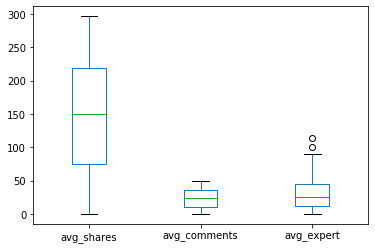

In [7]:
# 1.3
boxplot = pop_df.boxplot(column = ['avg_shares', 'avg_comments', 'avg_expert'], grid = False)
plt.show()
# 2 outliers in avg_expert

In [8]:
# 1.4
pr.normalize(pop_df, copy = False)
pop_df.head()

,avg_shares,avg_comments,avg_expert,popularity_score
0,0.974525,0.158121,0.126364,0.096592
1,0.645597,0.033860,0.744919,0.164785
2,0.376136,0.790096,0.453885,0.168105
3,0.989807,0.051487,0.085111,0.101923
4,0.993117,0.093697,0.006089,0.070019


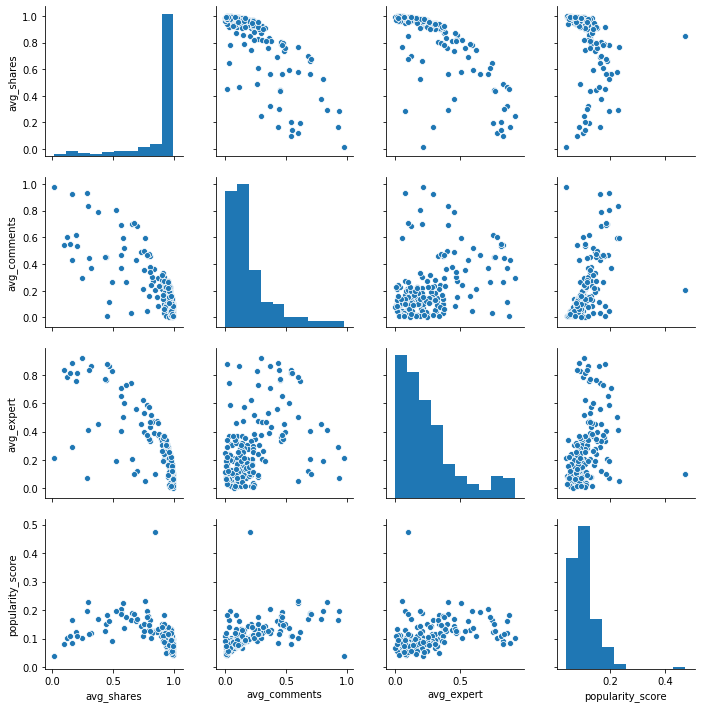

In [9]:
# 2. 
sns.pairplot(pop_df)
plt.show()

In [10]:
# 3. 
from sklearn.model_selection import train_test_split

x = pop_df.iloc[:, [0, 1, 2]].values
y = pop_df.iloc[:, 3].values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) 

In [12]:
# 4. 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(x_train, y_train)

In [13]:
pred = model.predict(x_test)
pred

array([0.12349675, 0.0985555 , 0.10471878, 0.1815277 , 0.10836966,
       0.11563583, 0.08244853, 0.06759823, 0.06299155, 0.05798215,
       0.11549113, 0.1616683 , 0.09405238, 0.0575021 , 0.0794636 ,
       0.10185878, 0.08333367, 0.12591851, 0.06998855, 0.15183643,
       0.16273462, 0.13210691, 0.1025094 , 0.13130542, 0.09804276,
       0.17583597, 0.11626729, 0.08474351, 0.08163332, 0.09842324,
       0.06261657, 0.08118654, 0.10584782, 0.07267477, 0.13134814,
       0.0896856 , 0.13515915, 0.08026992, 0.16525492, 0.06879427,
       0.10672371, 0.14227354, 0.09242331, 0.07537472, 0.10231605,
       0.14117333, 0.08924783, 0.10993566, 0.10585049, 0.08529019,
       0.05428182, 0.10379928, 0.07764548, 0.07179118, 0.07990781,
       0.11777121, 0.08170963, 0.09159211, 0.07908739, 0.14397986])

In [14]:
print("Coefficients : ", result.coef_)
print("Intercept : ", result.intercept_)

Coefficients :  [0.18063413 0.22822461 0.13566486]
Intercept :  -0.13400247326024184


In [15]:
m = sm.OLS.from_formula('popularity_score ~ avg_shares + avg_comments + avg_expert', data = pop_df)
r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       popularity_score   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     38.57
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.23e-19
Time:                        16:21:16   Log-Likelihood:                 373.34
No. Observations:                 200   AIC:                            -738.7
Df Residuals:                     196   BIC:                            -725.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0693      0.036     -1.950      0.053      -0.139       0.001
avg_shares       0.1276      0.031      4.062      0.000       0.066       0.190
avg_comments     0.1965      0.024      8.032      0.000       0.148       0.245
avg_expert       0.0968      0.021      4.582      0.000       0.055       0.139
==============================================================================
Omnibus:                      272.330   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25802.032
Skew:                           5.752   Prob(JB):                         0.00
Kurtosis:                      57.442   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# 5.
mod = smf.ols(formula = 'popularity_score ~ avg_shares + avg_comments + avg_expert', data = pop_df)
result = mod.fit()
print(result.summary())
# From the results below :
        
#     Variable        CI                       P
#     avg_shares    (0.066 to 0.190)           0
#   avg_comments    (0.148 to 0.245)           0
#     avg_expert    (0.055 to 0.139)           0
#      intercept   (-0.139 to 0.001)       0.053

                            OLS Regression Results                            
Dep. Variable:       popularity_score   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     38.57
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.23e-19
Time:                        16:21:16   Log-Likelihood:                 373.34
No. Observations:                 200   AIC:                            -738.7
Df Residuals:                     196   BIC:                            -725.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0693      0.036     -1.950   

In [17]:
# confidence intervals : 
# b +- (t X S)
# where b : Slope, t : t value, s : standard error : 
print(0.1276 - (4.062 * 0.031))       

0.001677999999999985


In [18]:
# 6. 
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, pred)
print('RMSE : ', rmse)
print('MAE : ', mae)
print('MSE : ', mse)

RMSE :  0.05662519058632023
MAE :  0.023606421372666157
MSE :  0.003206412208937089


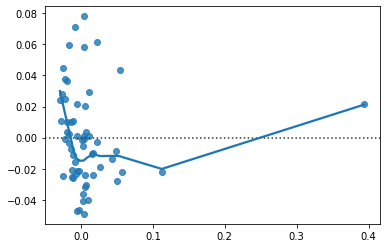

In [19]:
# 7. 
residuals = y_test - pred
sns.residplot(x = residuals, y = pred, lowess = True)

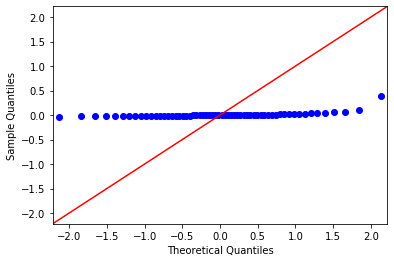

In [20]:
sm.qqplot(residuals, line = '45')
plt.show()